# **Author : Aniket Anil Dhakate**

# **Task 2 : Prediction using Unsupervised Machine Learning**

**In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.**

# Problem Statement

From the given **IRIS** Dataset predict the optimal number of clusters and represent it visually

# 1. Import Libraries

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 
from sklearn import datasets

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# 2. Read Data

In [3]:
# read excel data file using pandas
iris = pd.read_csv('iris.csv')

# head() to display top five rows
iris.head()

# Note: To display more rows, example 10, use head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Delete irrelevant Columns**

In [4]:
iris.drop(['Id','Species'],axis=1,inplace=True)

# 3. Exploratory Data Analysis

	
Data preparation is the process of cleaning and transforming raw data before building models.

Here we analyze the data with the following steps:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data type. Refer data definition to validate the data type
3. Check the distribution of variables
4. Check for the outliers 
5. Study summary statistics
6. Check for missing values
7. Scale the data

Note: it is an art to explore the data and one needs more and more practice to gain expertise in this area.

### 3.1 Understand the Dataset

**Dimensions of the data**

In [5]:
# 'shape' function gives the total number of rows and columns in the data
iris.shape

(150, 4)

**There are 150 observations and 4 columns in the daset**

### 3.2 Data Type

The main data types stored in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In our dataset, we have numerical and categorical variables. The numerical variables should have data type 'int64' while categorical variables should have data type 'object'.

1. Check for the data type
2. For any incorrect data type, change the data type with the appropriate type
3. Recheck for the data type

**1. Check for the data type**

In [6]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

#### **All the variables have the data type as per the data definition. Thus, there is no need for type conversion**

### 3.3 Distribution of Variables

**Check the distribution of all the variables.**

As all the variables are numerical, we plot the boxplot for each variable to check the distribution. Also, we can use these boxplots to identify the outliers in the variables.

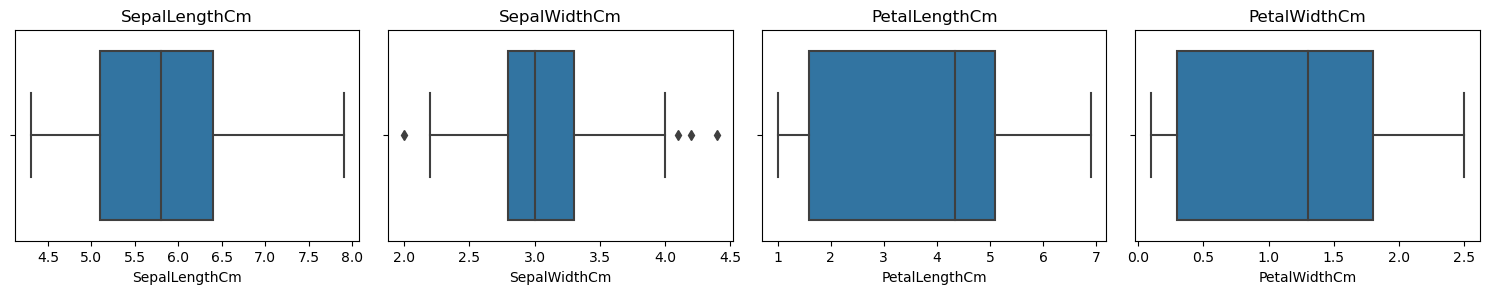

In [7]:
c=1
for i in iris:
    plt.subplot(3,4,c)
    sns.boxplot(iris[i])
    c+=1
    plt.title(i)
plt.tight_layout()
plt.show()

**The above boxplots show that the all variable is near normally distributed.**

### 3.4 Analysis of Outliers

**Importance of detecting an outlier**

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

The data distribution in the previous section exhibits that there is Np outliers in the data.Hence, we do not have to outliers treatment.

### 3.5 Summary Statistics

**Check the statistical summary of all the variables.**

In [8]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


	
The above output illustrates the summary statistics of the numerical variables.
The average sepal lentgh is 5.84 CM. Whereas the average Sepal Width is 3.05 CM.

### 3.6 Missing Values

**First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.**

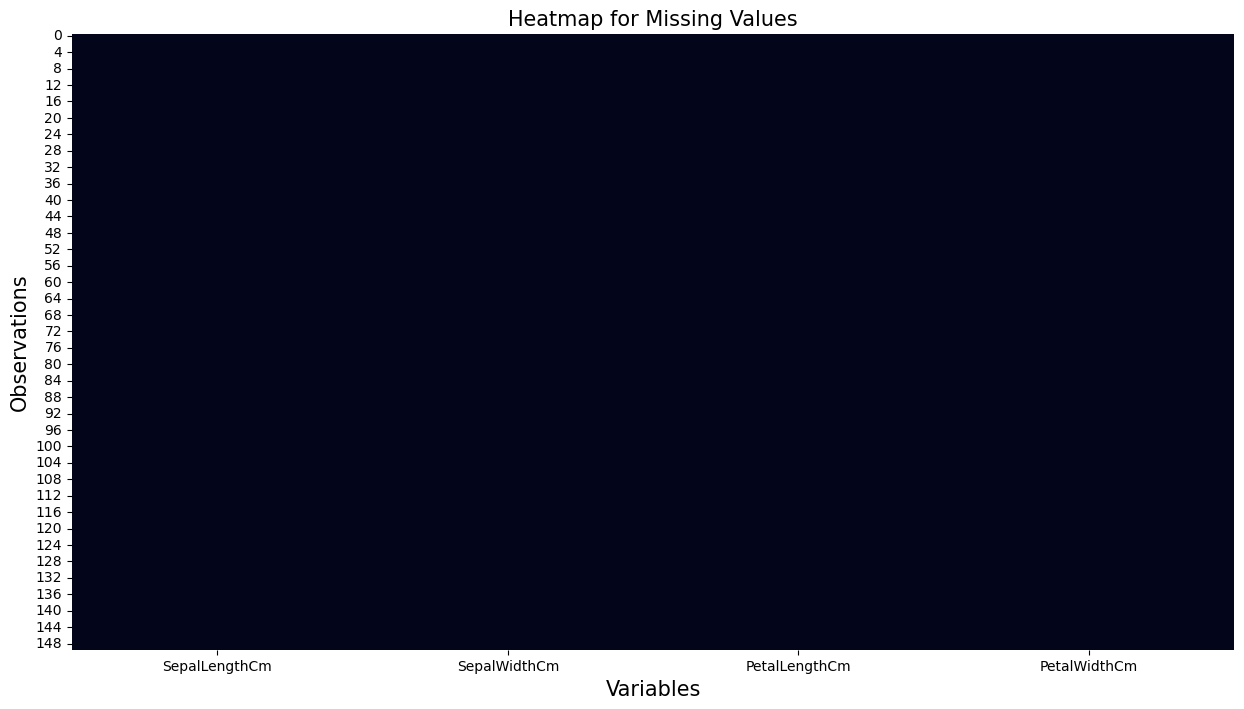

In [9]:
# plot heatmap to check null values
# the 'isnull()' returns the boolean output with value 'True' for the mising entry
# 'cbar = False' does not show the color axis 
sns.heatmap(iris.isnull(), cbar=False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Heatmap for Missing Values', fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel('Observations', fontsize = 15)

# display the plot
plt.show()

**The above plot shows that there are no missing values in the data.**

**Note: The heatmap represents the missing values with the horizontal non-black colored lines across the observation and the variable that contain missing data.**

### 3.7 Prepare the Data

Feature scaling is used to transform all the variables in the same range. If the variables are not in the same range, then the variable with higher values can dominate our final result.

The two most discussed scaling methods are min-max normalization and z-score normalization (aka standardization).

**Scale the data**

Here let us use the z-score normalization (i.e. standardization) technique to scale the dataset. In the scaled data, each variable will have a mean 0 and a standard deviation of 1.

In [10]:
# create a copy of the original dataset 
features = iris.copy()

# head() to display top five rows
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# instantiate the 'StandardScaler()'
scaler = StandardScaler()

# fit the scaler on 'features' and transform the data 
features = scaler.fit_transform(features)     

# create a dataframe of the scaled features 
# pass the required column names to the parameter 'columns'
features_scaled = pd.DataFrame(features, columns = iris.columns)
                               
# head() to display top five rows
features_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**Thus, we have scaled all the features in the data and stored it in a dataframe 'features_scaled'.**

# 4. K-means Clustering

K-means is the most widely-used centroid-based clustering algorithm. In this method, we need to prespecify the number of clusters to the algorithm. This method tends to build more circular clusters.

Let us first identify the optimal number of clusters and analyze the obtained clusters.

### 4.1 Identify the Optimal Number of Clusters

Plot the elbow plot and identify the optimal number of clusters. Also, use the silhouette score method to validate the optimal number of clusters.

We do not know how many clusters give the most useful results. So, we create the clusters with varying K, from 1 to 7 and then decide the optimum number of clusters (K) with the help of the elbow plot.

In [12]:
# create several cluster combinations ranging from 1 to 7 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

Let us plot the elbow plot and identify the elbow point.


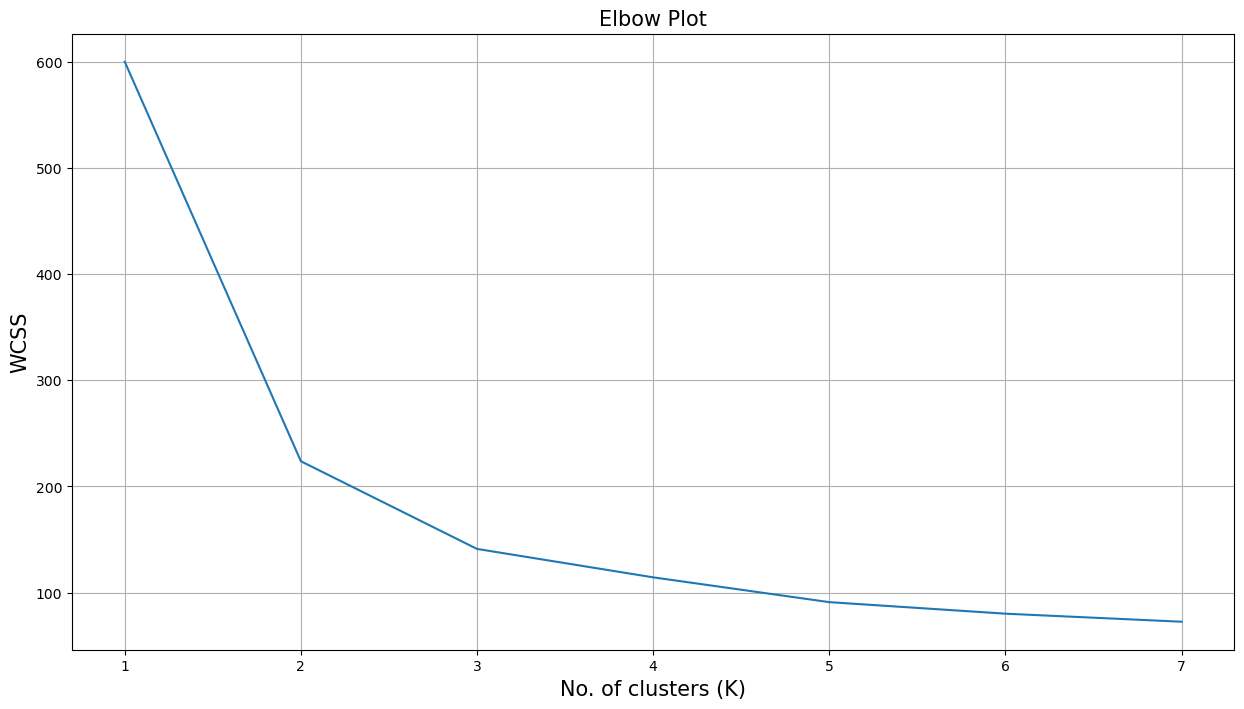

In [23]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,8), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.grid()
plt.show()

From the above plot, we can consider the K = 2 or 3 as the optimal number of clusters; as after these values, the WCSS is not decreasing rapidly.

In [14]:
# import the 'KneeLocator' 
from kneed.knee_locator import KneeLocator

# pass the number of clusters and corresponding WCSS to parameters 'x' and 'y' respectively
# pass the type of the curve to the parameter 'curve'
# pass the direction of the data points to the parameter 'direction' 
k = KneeLocator(x  = range(1,8), y = wcss, curve = 'convex', direction = 'decreasing')

# 'elbow' returns the corresponding x-axis value at the maximum curvature 
k.elbow

2

The python in-built elbow locator function returns K = 2 as the optimal value for the number of clusters.

**Use the silhouette score method to validate the optimal number of clusters**

Let us find the silhouette score with different values of K from 2 to 7. We consider the optimal value of K for which the silhouette score is maximum.

**Note: Since the silhouette score considers the inter-cluster and intra-cluster distance, we never set K = 1.**

In [15]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6, 7]

# use 'for' loop to build the clusters with different K
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # pass the scaled data and predicted labels to the 'silhouette_score()'
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.580184463257396)
For n_clusters = 3, silhouette score is 0.46214947389312017)
For n_clusters = 4, silhouette score is 0.3868603029959941)
For n_clusters = 5, silhouette score is 0.344785734559291)
For n_clusters = 6, silhouette score is 0.3259365058730077)
For n_clusters = 7, silhouette score is 0.3346062225960434)


The optimum value for K is associated with the highest value of the silhouette score. From the above output it can be seen that, for K = 2, the score is the highest.

From the elbow plot and silhouette score method, we can consider the optimal number of clusters as 2.

Now let us group the dataset into 2 clusters.

### 4.2 Build the Model

Let us group the dataset into 2 clusters and check the number of elements in each cluster.

In [16]:
# build a K-Means model for K = 3
# pass the 'random_state' to obtain the same centroid initialization for each code run
K_model = KMeans(n_clusters= 2, random_state= 10)

# fit the model on the scaled data
K_model.fit(features_scaled)

KMeans(n_clusters=2, random_state=10)

**As we have built the 2 clusters, now we want to know how many species belong to each cluster.**

In [17]:
# add a column 'Kmeans_label' to the original dataframe
# the 'labels_' returns the cluster number for each observation
iris['Kmeans_label'] = K_model.labels_

# use the 'head()' to display top five rows
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Kmeans_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The new column of cluster label added to the dataframe that indicates the cluster number for each observation.

**Check the size of each cluster**

In [18]:
# the 'unique()' returns the number of distinct clusters
# the 'return_counts = True' gives the number observation in each cluster
np.unique(K_model.labels_, return_counts=True)                

(array([0, 1]), array([ 50, 100], dtype=int64))

We have formed two clusters, where there are 50 observartions in one cluster, and 100 in the other one clusters.

### Plot a barplot to visualize the cluster sizes.

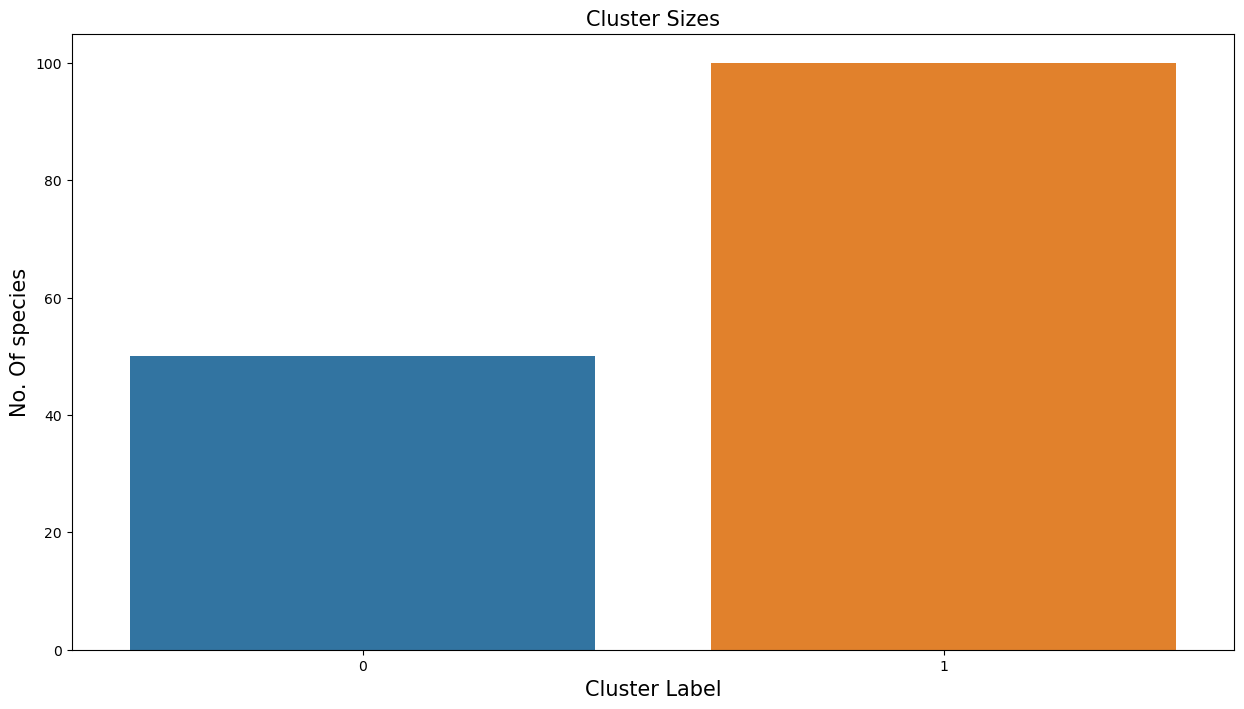

In [19]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= iris, x = 'Kmeans_label')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. Of species', fontsize = 15)
# display the plot
plt.show()

# 7. Visualize the Clusters

In [20]:
# consider 'n_components=2' to get the two principal components 
# pass the 'random_state' to get the same output for multiple runs
pca_2 = PCA(n_components = 2, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca_2.fit_transform(features_scaled)

# create a dataframe of the principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

# head() to display top five rows of the transformed data
df_pca.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


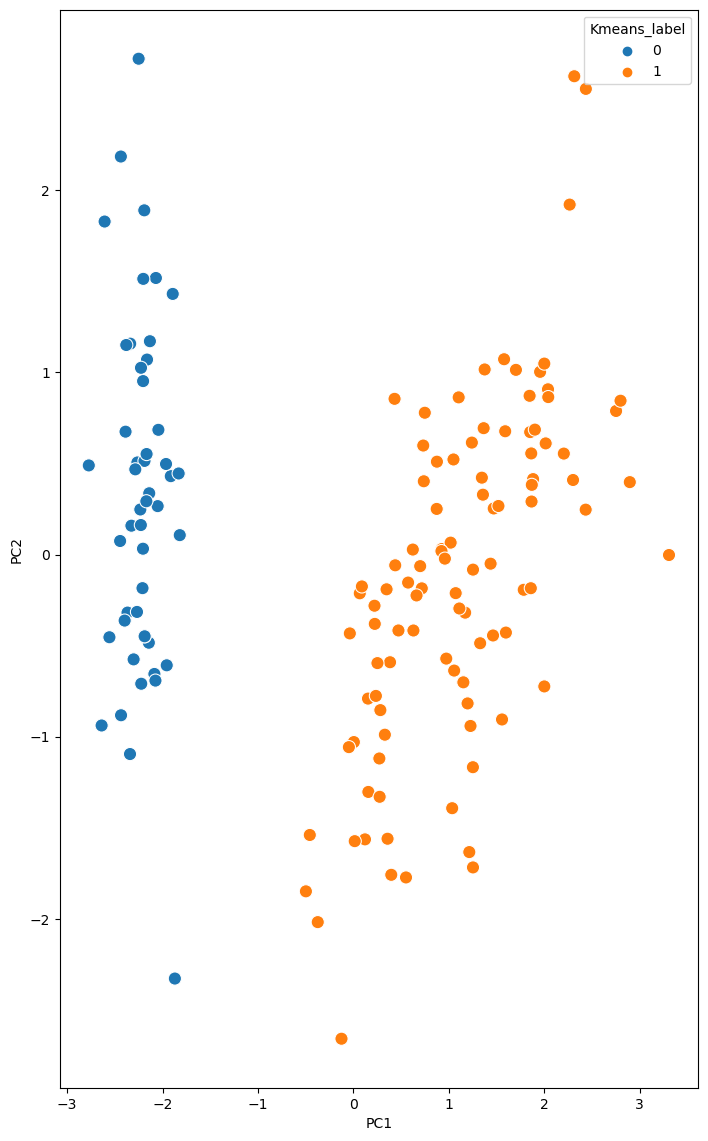

In [21]:
# set the plot size
plt.figure(figsize = (28, 14))

# plot a scatterplot to visualize the clusters
# pass the 1st and 2nd principal component to the parameter 'x' and 'y' respectively
# pass the dataframe of PCA components to the parameter 'data'
# pass the size of the data points to the parameter 's'
# pass the cluster labels to the parameter 'hue' to display the clusters with different colors
# pass the required colors to the parameter 'palette'

# plot the first subplot
# pass the row, column and plot index to the 'subplot()'
plt.subplot(1,3,1)
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca,  s = 90, hue = iris['Kmeans_label'], palette = 'tab10')


# display the plot
plt.show()

In [22]:
print(kmeans.cluster_centers_)

[[-0.3640806  -1.41420269  0.1074491   0.00175297]
 [-0.73463631  1.45201075 -1.29704352 -1.21071997]
 [ 0.36089019 -0.83277844  0.82296939  0.86019413]
 [ 1.12524562  0.39338504  1.02434088  1.20078646]
 [-1.34320731  0.12656736 -1.31407576 -1.30726051]
 [ 1.96190977 -0.38528594  1.44514709  1.06997085]
 [ 0.29010652 -0.17283408  0.40783821  0.32816862]]


### This concludes the K-Means Workshop.

# **E N D**